# Final Project Submission


* Student name: **Mitch Michniowski**
* Student pace: **Self-Paced**
* Scheduled project review date/time: **Nov 6th, 2019**
* Instructor name: **Eli Thomas**
* Blog post URL: **TBD**


## Column Names and Descriptions for Kings County Data Set
* **id** - unique identified for a house
* **dateDate** - house was sold
* **pricePrice** -  is prediction target
* **bedroomsNumber** -  of Bedrooms/House
* **bathroomsNumber** -  of bathrooms/bedrooms
* **sqft_livingsquare** -  footage of the home
* **sqft_lotsquare** -  footage of the lot
* **floorsTotal** -  floors (levels) in house
* **waterfront** - House which has a view to a waterfront
* **view** - Has been viewed
* **condition** - How good the condition is ( Overall )
* **grade** - overall grade given to the housing unit, based on King County grading system
* **sqft_above** - square footage of house apart from basement
* **sqft_basement** - square footage of the basement
* **yr_built** - Built Year
* **yr_renovated** - Year when house was renovated
* **zipcode** - zip
* **lat** - Latitude coordinate
* **long** - Longitude coordinate
* **sqft_living15** - The square footage of interior housing living space for the nearest 15 neighbors
* **sqft_lot15** - The square footage of the land lots of the nearest 15 neighbors

## Deliverables:
    
1) A well documented Jupyter Notebook containing any code you've written for this project and comments explaining it.

    A) The notebook is written for a technical audience. 
    
    B) Prepare to answer a series of questions about the technical aspect of the data and your approach (~30 minutes)
    
    C) Visualizations
    
        1. Have 3 meaningful, well-labled, and easy-to-identify questions and answer them through EDA.
        2. Have at least 4 meaningful data visualizations with interpretations, axes labels, a title, and a legend.
        3. Have 1 - 2 paragraphs explaining your approach to this project through the OSEMN framework.
        
    D) Model Quality / Approach
    
        1. Have no predictors with p-values greater than .05.
        2. Pick at least 3 coefficients from your final model and explain their impact on the price of a house.
        3. Model with an iterative approach, detailing and explaining the parameters and results at each iteration.
        4. Explain the changes made from one iteration to the next, and why you made these choices.

2) A short Keynote/PowerPoint/Google Slides presentation (delivered as a PDF export) giving a high-level overview of your methodology and recommendations for non-technical stakeholders.
    
    A) Make sure to also add a .pdf of your presentation to the repository with a file name of presentation.pdf.
    
        1. It should contain 5-10 professional-quality slides.
        2. Use visualizations whenever possible.
        3. Avoid technical jargon.
    
    B) Prepare for a 45 minute 1:1 session with one of the instructors.
        
        1. 5-minute presentation to a non-technical stakeholder
        2. 5-minutes for Q&A

3) A blog post (800-1500 words) about one element of the project - it could be the EDA, the feature selection, the choice of visualizations or anything else technical relating to the project. It should be targeted at your peers - aspiring data scientists.

# Obtain Data

## Import Libraries

In [44]:
### I import all necessary built-in libraries in python, which contain statistical or graphing tools that will help me 
### conduct data analysis. I also change the style of certain displays using the 'darkgrid' style, to make my graphics
### more aesthetically pleasing. For the multiple regression analysis to be conducted, I import the OLS tool from
### statsmodel. Finally, for model validation I import the train-test split, Linear Regression, and mean squared error
### tools from SciKitLearn.

import pandas as pd

import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
sns.set(style='darkgrid')

import statsmodels.api as sm
from statsmodels.formula.api import ols

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

## Import Data

In [45]:
### I import the data as a Pandas DataFrame

df = pd.read_csv('kc_house_data.csv')

## Is Import Successful?

In [46]:
### I check if the import was successful by checking the first few rows and columns of the imported data using the 
### .head() method.

df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


# Scrub Data

## Quick Glance at the Data

Before moving on to the scrubbing phase, I quickly review some basic information on my data. By calling the .info() and .describe() methods, I am able to learn how many rows and columns my data contain, in addition to the data types (int, object, float, etc.). As I was provided with information on what the column headings represent, I can ascertain whether the type of data matches my expectations and whether I need to call the .cast() method. I will also be able to tell which columns have missing data. I also get standard statistical information about the data, such as the mean, standard deviation, minimum and maximum value, etc. 

In [47]:
print(df.info())
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
id               21597 non-null int64
date             21597 non-null object
price            21597 non-null float64
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
floors           21597 non-null float64
waterfront       19221 non-null float64
view             21534 non-null float64
condition        21597 non-null int64
grade            21597 non-null int64
sqft_above       21597 non-null int64
sqft_basement    21597 non-null object
yr_built         21597 non-null int64
yr_renovated     17755 non-null float64
zipcode          21597 non-null int64
lat              21597 non-null float64
long             21597 non-null float64
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
dtypes: float64(8), int64(11), object(2)
memory usage: 3.5+ MB
None


,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.159700e+04,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,19221.000000,21534.000000,21597.000000,21597.000000,21597.000000,21597.000000,17755.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,4.580474e+09,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,0.007596,0.233863,3.409825,7.657915,1788.596842,1970.999676,83.636778,98077.951845,47.560093,-122.213982,1986.620318,12758.283512
std,2.876736e+09,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,0.086825,0.765686,0.650546,1.173200,827.759761,29.375234,399.946414,53.513072,0.138552,0.140724,685.230472,27274.441950
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,3.000000,370.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


## Taking a Subset of Data

Occasionally with large data sets, it may be necessary to take a subset of the data when building out an iterative model in order to minimize lag time. As the data dimensions are 21,597 rows by 21 columns, the dataset is not excessively large. Therefore, a subset will not be selected prior to building out the model.

## Checking for Null Values

It is important to check for null (or N/A) values within the dataset, as having such values will impact the ability to perform a multiple regression model. In this analyst's opinion, rows containing null values should and will be removed. First and foremost, however, columns containing more than 10% of null values will be removed entirely from the dataset.

In [48]:
### I check for the total number and also percent of null values within the dataset

df_nulls_total = df.isnull().sum()
print(df_nulls_total)

print(
      )

df_nulls_percent = (df.isnull().sum()/df.count()) * 100
print(df_nulls_percent)

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

id                0.000000
date              0.000000
price             0.000000
bedrooms          0.000000
bathrooms         0.000000
sqft_living       0.000000
sqft_lot          0.000000
floors            0.000000
waterfront       12.361480
view              0.292561
condition         0.000000
grade             0.000000
sqft_above        0.000000
sqft_basement     0.000000
yr_built          0.000000
yr_renovated     21.638975
zipcode           0.000000
lat               0.000000
long              0.000000
sqft_living

In [49]:
### I drop the columns whose null value percentage has exceeded my tolerance threshold. In this case, it is waterfront 
### and yr_renovated

df = df.drop(['yr_renovated', 'waterfront'], axis=1)
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,view,condition,grade,sqft_above,sqft_basement,yr_built,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,0.0,3,7,1180,0.0,1955,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,3,7,2170,400.0,1951,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,3,6,770,0.0,1933,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,5,7,1050,910.0,1965,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,3,8,1680,0.0,1987,98074,47.6168,-122.045,1800,7503


In [50]:
### And I also drop the remaining rows that contain null values. I set axis = 0 to specify that I want to remove rows 
### and not columns. I set inplace = True to make this a permanent change to the underlying dataset. These represent 
### only 63 rows in total, which is a small fraction of the available data. I am comfortable with losing that amount of 
### data.

df.dropna(axis = 0, inplace = True)

### I print out the sum of null values again to ensure that all null values are out of the dataset

df.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

## Changing the Data Types

As can be inferred as a result of the .info() method above, the following columns need to be changed due to their respective data type not matching the column description:

**id** - this is stored as an integer, but should be an object value

**date** - this is stored as an object, but should be a datetime value

**condition** - this is stored as an integer, but should be a category (object) value

**sqft_basement** - this is an object value, but should be an integer value

**zipcode** - this is stored as an integer, but should be a category (object) value


In [51]:
# Un-# Once complete with the full Jupyter Notebook

#df.id = df.id.astype("str")
#df.date =  pd.to_datetime(df.date, format='%m/%d/%Y')
#df.condition = df.condition.astype("str")
#df.sqft_basement = pd.to_numeric(df.sqft_basement).astype("int")
#df.zipcode = df.zipcode.astype("str")

### The error lets me know that, for sqft_basement, there is a non-numeric value ("?") that needs to be addressed.

In [52]:
### I replace the "?" with a value of 0, which is an assumption that the square footage value of the basement is 0.

df.sqft_basement.replace(to_replace = "?", value = 0, inplace = True)

In [53]:
### I now retry the .astype() method on four of the columns from above. I also use the new pd.to_datetime() method that 
### I researched independently in order to learn how to change object data into dates, as .astype() did not work.

df.id = df.id.astype("str")
df.date =  pd.to_datetime(df.date, format='%m/%d/%Y')
df.condition = df.condition.astype("str")
df.sqft_basement = pd.to_numeric(df.sqft_basement).astype("int")
df.zipcode = df.zipcode.astype("str")

In [54]:
### I confirm that the data types have been recast by calling the .info() method once again

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21534 entries, 0 to 21596
Data columns (total 19 columns):
id               21534 non-null object
date             21534 non-null datetime64[ns]
price            21534 non-null float64
bedrooms         21534 non-null int64
bathrooms        21534 non-null float64
sqft_living      21534 non-null int64
sqft_lot         21534 non-null int64
floors           21534 non-null float64
view             21534 non-null float64
condition        21534 non-null object
grade            21534 non-null int64
sqft_above       21534 non-null int64
sqft_basement    21534 non-null int32
yr_built         21534 non-null int64
zipcode          21534 non-null object
lat              21534 non-null float64
long             21534 non-null float64
sqft_living15    21534 non-null int64
sqft_lot15       21534 non-null int64
dtypes: datetime64[ns](1), float64(6), int32(1), int64(8), object(3)
memory usage: 3.2+ MB


## Removing Multicollinear Data

Data that are highly correlated (i.e., multicollinear) can affect the score (or p-value) of the predictive capability of the independent variables on the dependent variable. It is important to have a correct understanding of each independent variable's predictive capability on the dependent variable to come up with the best model. In order to have accurate p-values, then, I identify and remove multicollinear data.

## Visualizing with a True/False Map

In [55]:
### I use the built-in pandas .corr() method for finding correlation. This method provides a numerical value between -1
### and 1, which quantifies the positive or negative correlation that two variables have. This is a large
### dataset with multiple variables, however, and I want to make intepreting this data as easily understandable to my
### non-technical business partners. Therefore, I add a logical statement to my corr.() method. I want a True/False map
### that only shows True when the correlation between variables is greater than or equal to 0.8 (or 80%). I take the
### absolute value (abs) of the correlation to ensure that the map also identifies strong negative correlations in 
### addition to positive ones.

abs(df.corr()) >= 0.80

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,view,grade,sqft_above,sqft_basement,yr_built,lat,long,sqft_living15,sqft_lot15
price,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False
bedrooms,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False
bathrooms,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False
sqft_living,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False
sqft_lot,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False
floors,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False
view,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False
grade,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False
sqft_above,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False
sqft_basement,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False


## Visualizing with a Heat Map

Text(0.5, 1.0, 'King County Dataset - Variable Heat Map')

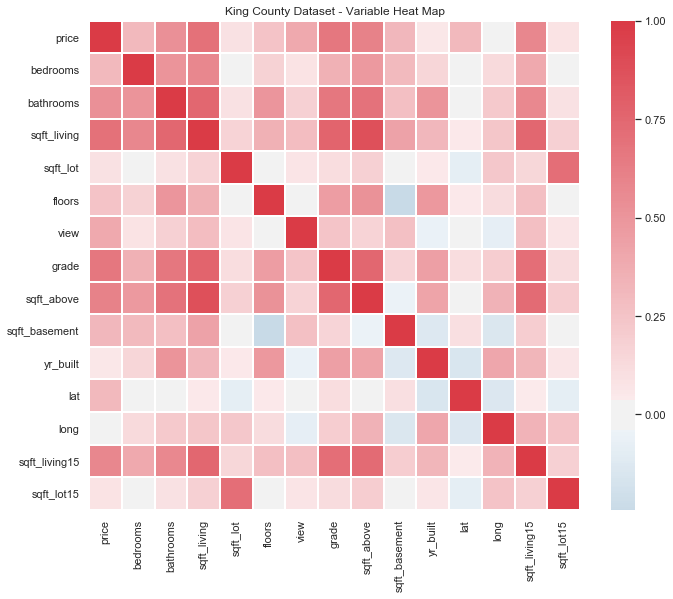

In [56]:
### A good way of visualizing the (numerical) results of correlation is to use the .heatmap() method provided in the 
### seaborn library. This takes the numerical value of the correlation and represents it with a sliding scale of color
### representing the degree of correlation. I use the .plt.subplot() method to adjust the overall size of the
### graph (figzise) and use the seaborn .diverging_palette() method to use a red/blue sliding scale, as I find it
### to be visually appealing and easy for readers to understand. Lastly, within the .heatmap() method in seaborn, I set
### the cetner=0, which makes cells containing a collinearity value of 0 the color white, and linewidth=1, for ease of
### reading.

f, ax = plt.subplots(figsize=(11, 9))
cmap = sns.diverging_palette(240, 10, n=9, as_cmap=True)

sns.heatmap(df.corr(), cmap = cmap, center = 0, linewidths = 1)

plt.title("King County Dataset - Variable Heat Map")

There are some True values within our map above that shine brightest red. Naturally, we will see a True value (or maximum red color) where two identical variables are compared, as the correlation between them should be a perfect 1.0. An example includes:

**bedrooms - bedrooms**

There are other True values, too, but not for identical variables. Nonetheless, the absolute value of their correlation is at least equal to or greater than 0.8. This includes:

**sqft_above - sqft_living**

Collinearity between the two of these independent variables ostensibly makes sense. The former defines the area of the square footage of the house apart from the basement. The latter defines the area of the square footage of the whole house. These variables both measure square footage and it is easy to comprehend how either an increase or decrease in one can subsequently increase ot decrease the other. For example, a house with low total square footage (sqft_living) will also then probably have a low square footage apart from the basement (sqft_above). In other words, a small house will also probably have a small basement. One of these should be removed.

Finally, on the heatmap, we see other examples of red color (representing high collinearity), but which does not surpass ourthreshold of being equal to or greater than 0.8, as evidenced by False values on the True/False map. An example includes bathrooms - bedrooms, which also makes sense: as the number of bedrooms in a house increases, so too will the numbers of bathrooms (hopefully!). These are noted, but shall not be removed.

In [57]:
### I remove sqft_above due to its multicollinearity with sqft_living. I choose to keep sqft_living instead of
### sqft_above because I am making an assumption that it will be a more useful variable when it comes to the regression
### model. I base this assumption on the fact that I would rather know the square footage value of the whole house,
### rather than just the portion apart from the basement.

df = df.drop("sqft_above", axis = 1,)

In [58]:
### I check to make sure that the column is in fact removed from the dataset.

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21534 entries, 0 to 21596
Data columns (total 18 columns):
id               21534 non-null object
date             21534 non-null datetime64[ns]
price            21534 non-null float64
bedrooms         21534 non-null int64
bathrooms        21534 non-null float64
sqft_living      21534 non-null int64
sqft_lot         21534 non-null int64
floors           21534 non-null float64
view             21534 non-null float64
condition        21534 non-null object
grade            21534 non-null int64
sqft_basement    21534 non-null int32
yr_built         21534 non-null int64
zipcode          21534 non-null object
lat              21534 non-null float64
long             21534 non-null float64
sqft_living15    21534 non-null int64
sqft_lot15       21534 non-null int64
dtypes: datetime64[ns](1), float64(6), int32(1), int64(7), object(3)
memory usage: 3.0+ MB


In [59]:
df.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,view,grade,sqft_basement,yr_built,lat,long,sqft_living15,sqft_lot15
count,2.153400e+04,21534.000000,21534.000000,21534.000000,2.153400e+04,21534.000000,21534.000000,21534.000000,21534.000000,21534.000000,21534.000000,21534.000000,21534.000000,21534.000000
mean,5.400577e+05,3.373038,2.115712,2079.827854,1.509060e+04,1.494126,0.233863,7.657425,285.244311,1971.002275,47.560180,-122.213948,1986.299944,12751.079502
std,3.660596e+05,0.926410,0.768602,917.446520,4.138021e+04,0.539806,0.765686,1.172643,439.334095,29.376044,0.138528,0.140735,685.121001,27255.483308
min,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,3.000000,0.000000,1900.000000,47.155900,-122.519000,399.000000,651.000000
25%,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,7.000000,0.000000,1951.000000,47.471200,-122.328000,1490.000000,5100.000000
50%,4.500000e+05,3.000000,2.250000,1910.000000,7.617000e+03,1.500000,0.000000,7.000000,0.000000,1975.000000,47.571900,-122.230000,1840.000000,7620.000000
75%,6.450000e+05,4.000000,2.500000,2550.000000,1.068775e+04,2.000000,0.000000,8.000000,550.000000,1997.000000,47.678100,-122.125000,2360.000000,10083.000000
max,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,4.000000,13.000000,4820.000000,2015.000000,47.777600,-121.315000,6210.000000,871200.000000


## Normalizing Data

The results of a regression analysis cannot be relied upon unless they adhere to the certain preconditions, such as having (somewhat) normally distributed data. This means data whose frequency of observation groups closely around its mean, then tapering off gradually and equally in both positive and negative directions in a bell-shaped curve. Normally-distributed data can also be described as data whose mean, median, and mode are all identical (or nearly). Data that is not normal will need to be normalized. I will use a log-transformation on skewed data to satisfy this precondition of our regression model.

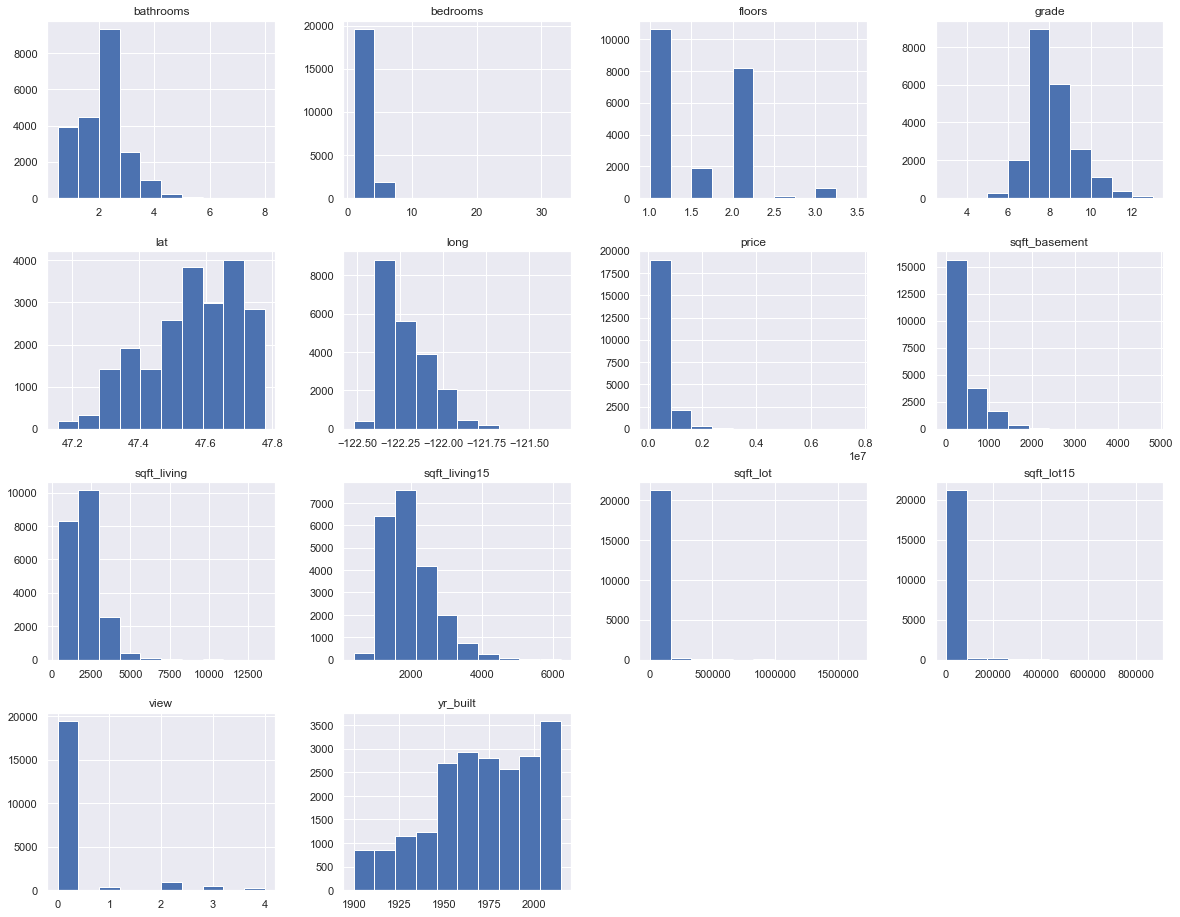

In [60]:
### I check for the distribution of the continuous variables in my dataset by using the .hist() method. 

df.hist(figsize = (20,16))
plt.show()

In [61]:
### I set grade into a new dataframe for review in the EDA section further below

df_grade = df['grade']

There are a few columns of data that appear to have a relatively normal distribution, and those that do not. First, however, it is important to revisit the data to understand potential outliers. For example, **bedrooms** has a heavy negative skew, because it appears to have a small subset of values great than 30 (bedrooms). Common sense dictates further exploration, as 33 bedrooms seems excessive. Additionally, all columns dealing with square footage (**sqft_basement**, **sqft_living**, **sqft_living15**, **sqft_lot**, and **sqft_lot15**) also appear to have outliers that require further analysis.

In [62]:
### I create a new DataFrame with any row for which "bedrooms" is greater than 30. 

df_greater_than_30 = pd.DataFrame(df[df["bedrooms"] > 30])
print(df_greater_than_30)

print(
      )

### Only one such row appears, lending credence to the possibility that it is a typo (3, instead of 33 bedrooms). I
### solve this by taking and comparing the squarefoot livingspace (sqft_living) per bedroom of my new DataFrame to the
### average of the original by creating two new variables.


sqft_by_bedroom = df_greater_than_30.sqft_living/df_greater_than_30.bedrooms
print(sqft_by_bedroom)

print(
      )

average_sqft_by_bedroom = df.sqft_living.mean()/df.bedrooms.mean()
print(average_sqft_by_bedroom)


### 49 sqft/bedroom for the "33-bedroom" house, as compared to 616 sqft/bedroom mean for the rest of the population
### gives me enough confidence to follow through with my assumption of the existence of a typo. I override the data
### again using the .replace() method.


df.replace(to_replace = 33, value = 3, inplace = True)

               id       date     price  bedrooms  bathrooms  sqft_living  \
15856  2402100895 2014-06-25  640000.0        33       1.75         1620   

       sqft_lot  floors  view condition  grade  sqft_basement  yr_built  \
15856      6000     1.0   0.0         5      7            580      1947   

      zipcode      lat     long  sqft_living15  sqft_lot15  
15856   98103  47.6878 -122.331           1330        4700  

15856    49.090909
dtype: float64

616.6037447511529


In [63]:
### I create a new DataFrame with any row for which "sqft_living" is greater than 10,000 (square feet). Three (3) rows
### of data are generated, each with an above average price, number of bedrooms/bathrooms, number of floors, and
### grades. These are most likely mansions. Removing them from the dataset would be inappropriate and so will be left
### in.

df.mansion = df[df['sqft_living'] > 10000]
df.mansion

C:\Users\mmichniowski\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:6: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,view,condition,grade,sqft_basement,yr_built,zipcode,lat,long,sqft_living15,sqft_lot15
3910,9808700762,2014-06-11,7060000.0,5,4.5,10040,37325,2.0,2.0,3,11,2360,1940,98004,47.6500,-122.214,3930,25449
7245,6762700020,2014-10-13,7700000.0,6,8.0,12050,27600,2.5,3.0,4,13,3480,1910,98102,47.6298,-122.323,3940,8800
12764,1225069038,2014-05-05,2280000.0,7,8.0,13540,307752,3.0,4.0,3,12,4130,1999,98053,47.6675,-121.986,4850,217800


### Log Transformations

Having dealt with potential outliers, it is now time to log-transform the non-normally-distributed data. The columns that will be transformed include the following:

**floors**

**lat**

**long**

**price**

**sqft_living**

**sqft_living15**

**sqft_lot**

**sqft_lot15**

**view**


The below would also be candidate variables to be log-transformed for a more normal distribution, but due to the presence of (justified) zero (0) values, a log-transformation is not possible. This is because it is not possible to take the log of zero (the answer is undefined).

**sqft_basement**

**yr_built**

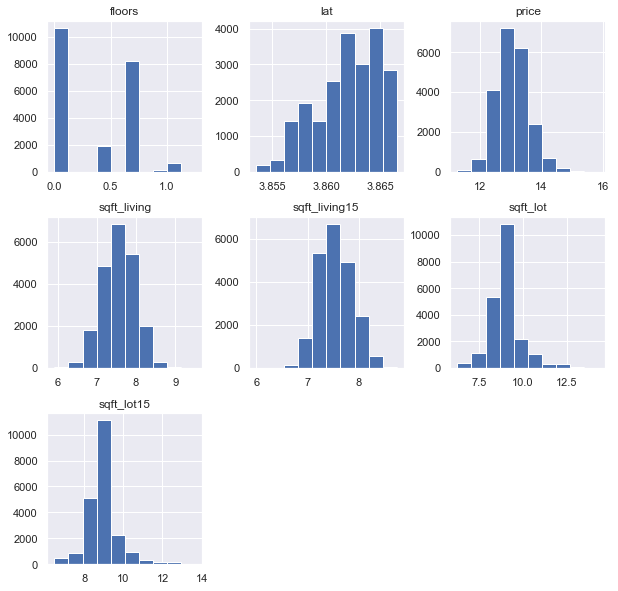

In [64]:
### I use the Numpy library log method on the above-selected variables and then plotted the histograms with the .hist()
### method. For the most part, the resultant log-transformed variables have more normal distributions than above.

df_log_values = pd.DataFrame([])
df_log_values["floors"] = np.log(df["floors"])
df_log_values["lat"] = np.log(df["lat"])
df_log_values["price"] = np.log(df["price"])
df_log_values["sqft_living"] = np.log(df["sqft_living"])
df_log_values["sqft_living15"] = np.log(df["sqft_living15"])
df_log_values["sqft_lot"] = np.log(df["sqft_lot"])
df_log_values["sqft_lot15"] = np.log(df["sqft_lot15"])

### In preparation for my final dataset, I am dropping the columns that I have log-transformed above. The normalized
### columns will be addedinto my final dataset later on.

df = df.drop(["floors", "lat", "price", "sqft_living", "sqft_living15", "sqft_lot", "sqft_lot15"], axis=1)

df_log_values.hist(figsize = (10,10))
plt.show()

## Scaling Data

In order to minimize the outsize impact that our independent variable's unit may cause, data within the set must be scaled. This means setting each independent variable on the same scale. In this case, it will be by calcualting the Min-Max score, which sets all values on a scale of 0 to 1. This is accomplished by calculating the difference of a datum from the minimum observed value, then dividing that difference by the maximum observed value within a column of data.

C:\Users\mmichniowski\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


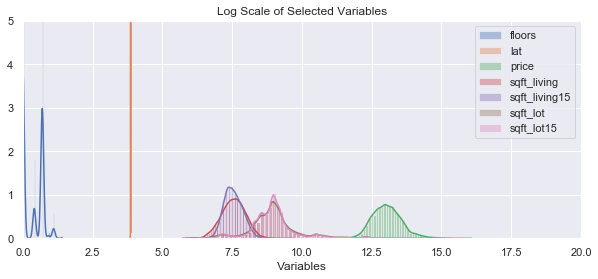

In [65]:
### I put all of my log-transformed independent variables on the same graph, to demonstrate the impact that differences
### in units can have. I use the .distplot() function from the seaborn library for grapghing.

plt.figure(figsize=(10,4))
plt.xlim(0, 20) 
plt.ylim(0, 5)
for i in df_log_values:
    sns.distplot(df_log_values[i], label = i)

plt.title('Log Scale of Selected Variables')
plt.xlabel('Variables')
plt.legend()
plt.show()

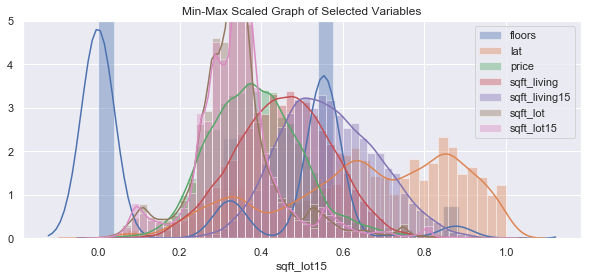

In [66]:
### I run a for-loop on all of my log-transformed independent variables using the standard min-max scaling method
### described above. I then re-graph it using the same .distplot() function from above.

for i in df_log_values:
    df_log_values[i] = (df_log_values[i] - min(df_log_values[i])) / (max(df_log_values[i]) - min(df_log_values[i]))
    
plt.figure(figsize=(10,4))
plt.ylim(0, 5)
for i in df_log_values:
    sns.distplot(df_log_values[i], label=i)

plt.title('Min-Max Scaled Graph of Selected Variables')
plt.legend()
plt.show()

#### Remaining Continuous Variables

The variables that are continuous, but that did not need to be log-transformed to impose a normal distribution also
need to be min-max scaled. These variables are:

**bedrooms**

**bathrooms**

**view**

**grade**

**sqft_basement**

**yr_built**

**long**

In [67]:
### First, I create a new pandas dataframe called scaled_variables and leave it blank, to be filled subsequently. Then, one by
### I add each of the above variables to the new scaled_variables dataframe after they have been min-max scaled. 
### Finally, I drop the variables from the original dataframe by using the .drop() method.

scaled_variables = pd.DataFrame([])

scaled_variables['bedrooms'] = (df['bedrooms'] - min(df['bedrooms'])) / (max(df['bedrooms']) - min(df['bedrooms']))
scaled_variables['bathrooms'] = (df['bathrooms'] - min(df['bathrooms'])) / (max(df['bathrooms']) - min(df['bathrooms']))
scaled_variables['view'] = (df['view'] - min(df['view'])) / (max(df['view']) - min(df['view']))
scaled_variables['grade'] = (df['grade'] - min(df['grade'])) / (max(df['grade']) - min(df['grade']))
scaled_variables['sqft_basement'] = (df['sqft_basement'] - min(df['sqft_basement'])) / (max(df['sqft_basement']) - min(df['sqft_basement']))
scaled_variables['yr_built'] = (df['yr_built'] - min(df['yr_built'])) / (max(df['yr_built']) - min(df['yr_built']))
scaled_variables['long'] = (df['long'] - min(df['long'])) / (max(df['long']) - min(df['long']))

df = df.drop(['bedrooms','bathrooms','view','grade','sqft_basement','yr_built','long'], axis = 1)

## Labeling and "One-Hot Encoding" for Categorical Values

Categorical values can be powerful predictor variables, but it is important to encode them so that our model does not interpret a numerical relationship between them. In other words, giving a value to the first category of the categorical variable as "1" and the second category as "2", does not mean that category "2" is worth twice that of category "1". In order to do this, I use "One-Hot Encoding", a built-in functions of the Pandas library. The categorical variables that I am going to one-hot encode are date and condition. The varibale condition will then be labeled will be zipcode. These are all independent variables with a .dtype() of "object" and "datetime64[ns]":

**date**

**condition**

**zipcode**

In [68]:
### I begin the process of deciding whether to one-hot encode or bin my categorical variables by observing the array of
### unique values for each variable by calling the .value_counts() method. I further call the .sort_index() method to
### order the index values in ascending order (kind of).

print('Date')
print(df.date.value_counts().sort_index())
print(
      )
print('Condition')
print(df.condition.value_counts().sort_index())
print(
      )
print('Zipcode')
print(df.zipcode.value_counts().sort_index())
print(
      )
print('Grade')
print(df.grade.value_counts().sort_index())

Date
2014-05-02     67
2014-05-03      4
2014-05-04      5
2014-05-05     84
2014-05-06     83
2014-05-07     93
2014-05-08     81
2014-05-09     81
2014-05-10      5
2014-05-11      2
2014-05-12     80
2014-05-13     86
2014-05-14     81
2014-05-15     82
2014-05-16     72
2014-05-17      1
2014-05-18      7
2014-05-19     83
2014-05-20    115
2014-05-21     93
2014-05-22     91
2014-05-23     84
2014-05-24     11
2014-05-25      5
2014-05-26      8
2014-05-27    103
2014-05-28    110
2014-05-29     75
2014-05-30     65
2014-05-31      5
             ... 
2015-04-18      5
2015-04-19      6
2015-04-20     77
2015-04-21    118
2015-04-22    121
2015-04-23    110
2015-04-24    102
2015-04-25     16
2015-04-26     13
2015-04-27    124
2015-04-28    121
2015-04-29    112
2015-04-30     83
2015-05-01     77
2015-05-02      6
2015-05-03     10
2015-05-04    102
2015-05-05     94
2015-05-06     88
2015-05-07     76
2015-05-08     54
2015-05-09      3
2015-05-10      2
2015-05-11     40
2015-

AttributeError: 'DataFrame' object has no attribute 'grade'

#### Date

It is clear by looking at the results of the .value_counts() method above that some variables have far too many unique values to be meaningfully one-hot encoded or binned. For example, the column "date" has 371 unique values. I will transform the "date" column by grouping it into quarters first, then one-hot encoding the resulting quarters.

In [69]:
### I check the range of dates in the "date" column by identifying minimum and maximum values through the .min() and 
### the .max() methods

print(df.date.min())
print(df.date.max())

2014-05-02 00:00:00
2015-05-27 00:00:00


I am thus able to determine that the dates range from 5/02/2014 - 5/27/2015, meaning that I will have the following five potential values:

**Q2_2014**   /   **Q3_2014**   /   **Q4_2014**   /   **Q1_2015**   /   **Q2_2015**

I transform the "date" column via the following process:

In [70]:
### I create a temporary DataFrame column entitled "quarter" by using the Pandas to_datetime() function on the "date"
### column, following with the dt.quarter function to convert the date to its respective quarter, then using the 
### .astype() function to convert the value to a string (for future concatentation).

df.quarter = pd.to_datetime(df.date).dt.quarter.astype("str")

### I create a temporary DataFrame column entitled "year" by using the Pandas to_datetime() function on the "date"
### column, following with the dt.year function to convert the date to its respective year, then using the .astype()
### function to convert the value to a string (for future concatentation).

df.year = pd.to_datetime(df.date).dt.year.astype("str")

### I change the "date" column values from their previous date values to the sum value of the temporary "quarter"
### column and the temporary "year" value. I accomplish this by callling the .str.cat() funciton within Pandas. I
### preceed all values with a "Q" (to denote "Quarter") and seperate the quarter and year with a "_" seperator.

df.date = ("Q" + df.quarter.str.cat(df.year, sep = "_"))

### I check the first five rows to ensure that my process worked

df.head()

C:\Users\mmichniowski\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  """
C:\Users\mmichniowski\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:11: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  # This is added back by InteractiveShellApp.init_path()


,id,date,condition,zipcode
0,7129300520,Q4_2014,3,98178
1,6414100192,Q4_2014,3,98125
2,5631500400,Q1_2015,3,98028
3,2487200875,Q4_2014,5,98136
4,1954400510,Q1_2015,3,98074


In [71]:
### I one-hot encode the "date" column using the .get_dummies() method within the Pandas library. I also set the 
### drop_first parameter equal to True. This removes a (superfluous) dummy variable column, which reduces 
### multicollinearity within the dataset. I then check to see whether the encoding worked by calling the .head() 
### method with a display of 10, rather than the standard 5.

date_dummies = pd.get_dummies(df.date, drop_first = True)
date_dummies.head(10)

,Q2_2014,Q2_2015,Q3_2014,Q4_2014
0,0,0,0,1
1,0,0,0,1
2,0,0,0,0
3,0,0,0,1
4,0,0,0,0
5,1,0,0,0
6,1,0,0,0
8,0,1,0,0
9,0,0,0,0
10,0,1,0,0


#### Condition

In [72]:
### I one-hot encode the "condition" column using the .get_dummies() method within the Pandas library. I also add the
### paramter "prefix" as "condition". Otherwise, the new one-hot encoded columns would be "1", "2", "3", etc. and
### be difficult to discern. I also set the drop_first parameter equal to True. This removes a 
### (superfluous) dummy variable column, which reduces multicollinearity within the dataset. I then check to see 
### whether the encoding worked by calling the .head() method with a display of 10, rather than the standard 5.

condition_dummies = pd.get_dummies(df.condition, prefix = "condition", drop_first = True)
condition_dummies.head(10)

,condition_2,condition_3,condition_4,condition_5
0,0,1,0,0
1,0,1,0,0
2,0,1,0,0
3,0,0,0,1
4,0,1,0,0
5,0,1,0,0
6,0,1,0,0
8,0,1,0,0
9,0,1,0,0
10,0,1,0,0


#### Zipcode

The column "zipcode" has 70 unique values, which looks to be too many to one-hot encode as it will vastly expand the data set (by 70 columns). Unfortunately, as zipcode locations and its numerical representation are arbitrary, it cannot be reasonably binned. It will therefore have to be labeled.

In [73]:
### I label the "zipcode" column first by creating a dataframe of zipcode values and casting them as "category" value
### using the .astype('category') method within the Pandas library. I then code the values using the .cat.codes method.
### Now, all rows have a value between 1 and 70 representing each unique zipcode value from the original dataset.

zipcode_series = pd.Series(df.zipcode).astype('category')
print(zipcode_series)
print(
    )
zipcode_series = zipcode_series.cat.codes
zipcode_series

0        98178
1        98125
2        98028
3        98136
4        98074
5        98053
6        98003
8        98146
9        98038
10       98007
11       98115
12       98028
13       98074
14       98107
15       98126
16       98019
17       98103
18       98002
19       98003
20       98133
21       98040
22       98092
23       98030
24       98030
25       98002
26       98119
27       98112
28       98115
29       98052
30       98027
         ...  
21566    98117
21567    98102
21568    98116
21569    98042
21570    98107
21571    98125
21572    98117
21573    98038
21574    98074
21575    98178
21576    98103
21577    98056
21578    98042
21579    98103
21580    98059
21581    98040
21582    98001
21583    98053
21584    98004
21585    98125
21586    98010
21587    98065
21588    98144
21590    98136
21591    98116
21592    98103
21593    98146
21594    98144
21595    98027
21596    98144
Name: zipcode, Length: 21534, dtype: category
Categories (70, object): [98001, 98002,

0        66
1        55
2        16
3        58
4        37
5        29
6         2
8        60
9        23
10        6
11       49
12       16
13       37
14       45
15       56
16       11
17       42
18        1
19        2
20       57
21       25
22       40
23       18
24       18
25        1
26       53
27       48
28       49
29       28
30       15
         ..
21566    51
21567    41
21568    50
21569    26
21570    45
21571    55
21572    51
21573    23
21574    37
21575    66
21576    42
21577    31
21578    26
21579    42
21580    33
21581    25
21582     0
21583    29
21584     3
21585    55
21586     8
21587    34
21588    59
21590    58
21591    50
21592    42
21593    60
21594    59
21595    15
21596    59
Length: 21534, dtype: int8

In [ ]:
### I remove the original columns from my DataFrame by calling the .drop() method, with the "axis" parameter set to 1,
### which stipulates that I want columns removed rather than rows. I then merge my original DataFrame with the encoded
### dummy columns, labeled columns, and normalized/log-transformed variables I made using the .concat() method that 
###the Pandas library has, again stipulating the axis.

df = df.drop(['date', 'condition', 'zipcode'], axis=1)
df = pd.concat([df, df_log_values, scaled_variables, date_dummies, condition_dummies, zipcode_series], axis=1)
df.head()

# Explore Data

## Exploratory Data Analysis (EDA)

Before we can begin modeling with our data, it is important to obtain a basic understanding of the underlying data. Familiarity with the underlying data will provide insight into  the resultant data modeling. Otherwise, the outcome would be without context and it could be difficult to understand the conclusions reached by the model.

### Jointplots and Scatterplots

In [75]:
df.dtypes.unique()

array([dtype('O'), dtype('float64'), dtype('uint8'), dtype('int8')],
      dtype=object)

C:\Users\mmichniowski\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


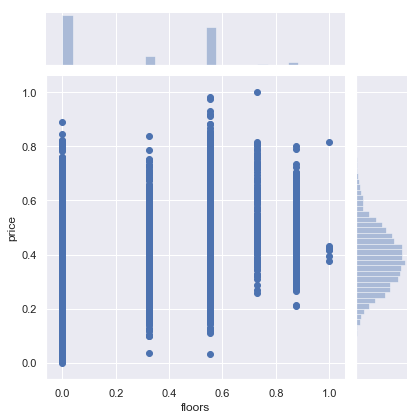

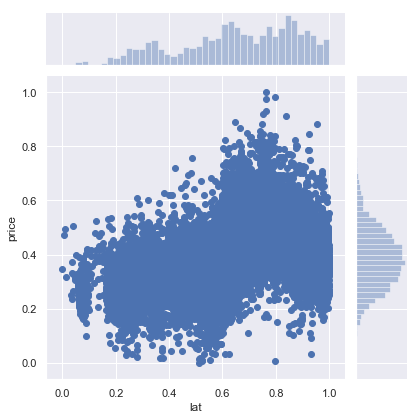

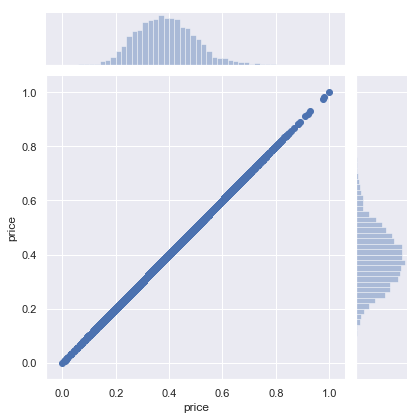

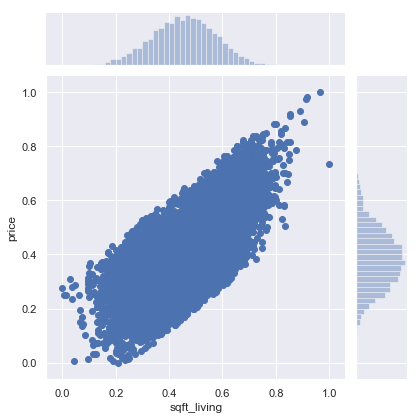

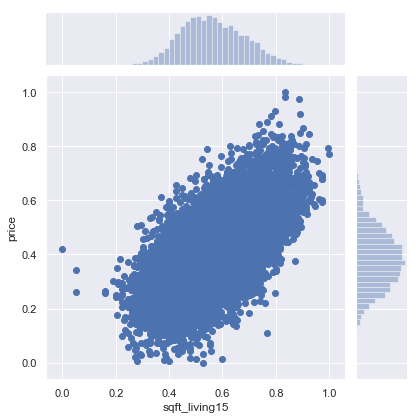

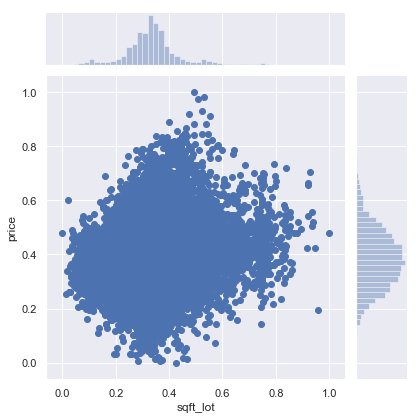

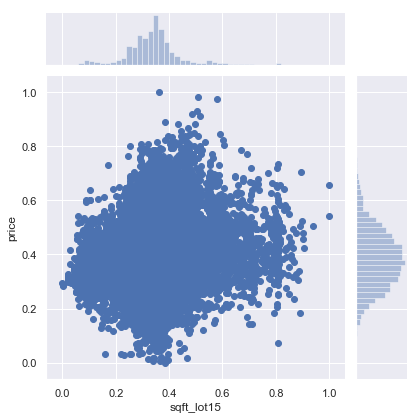

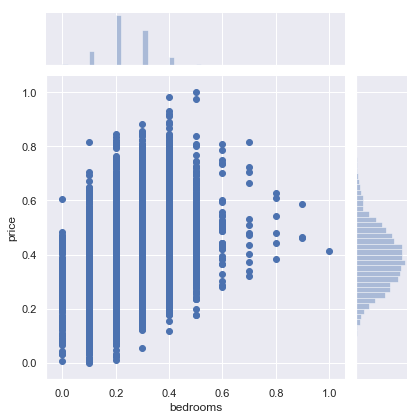

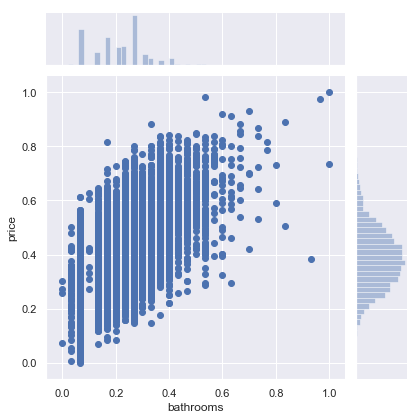

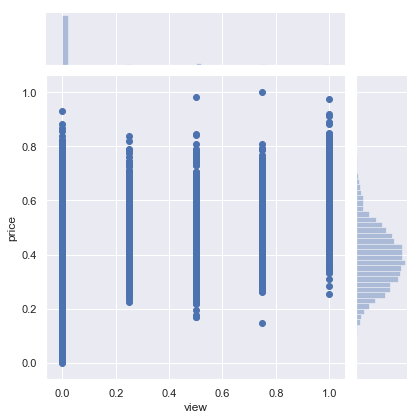

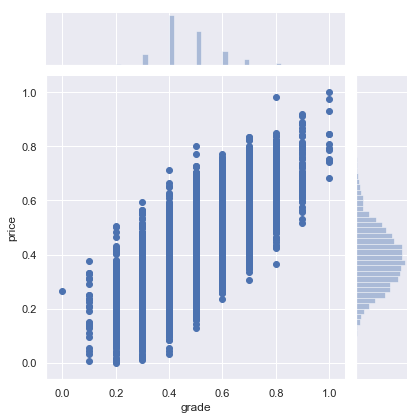

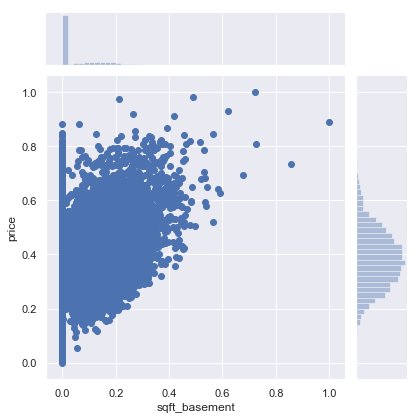

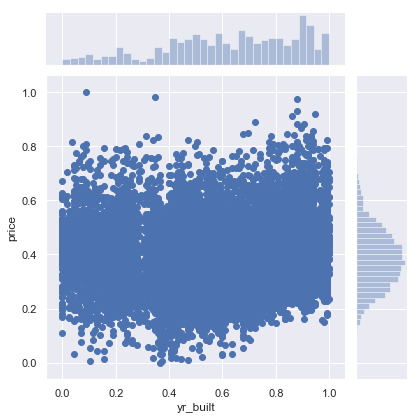

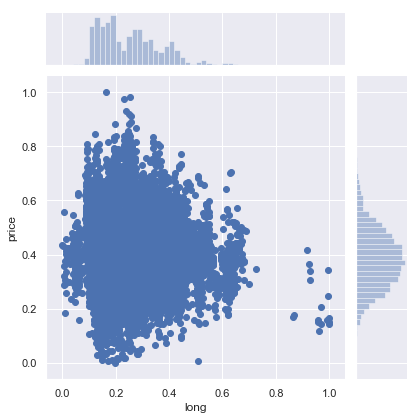

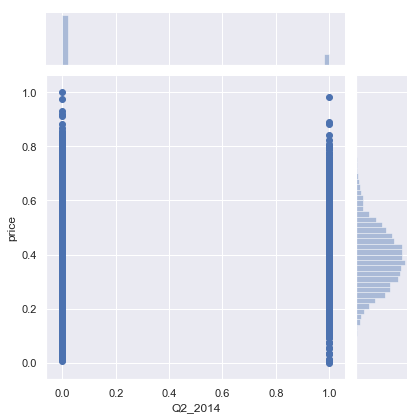

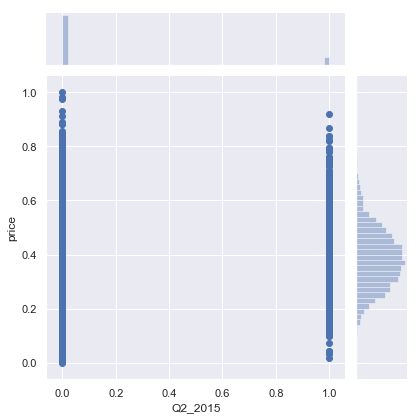

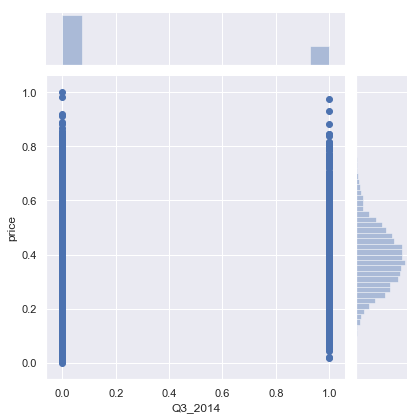

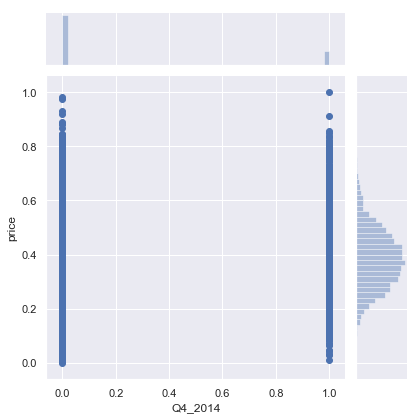

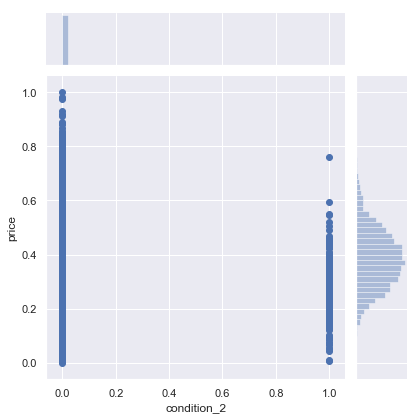

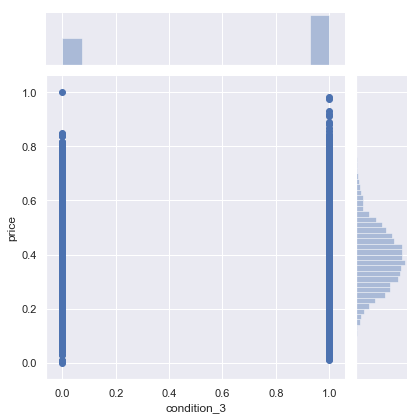

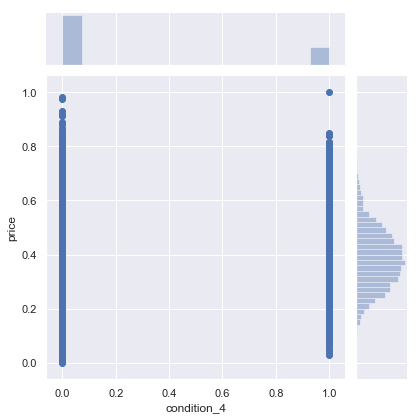

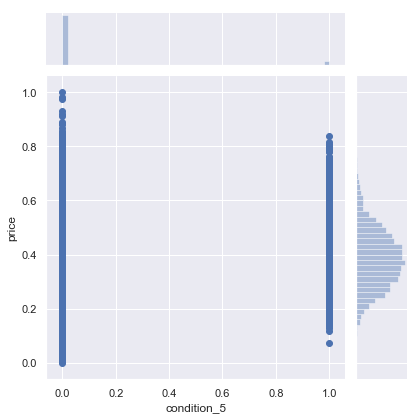

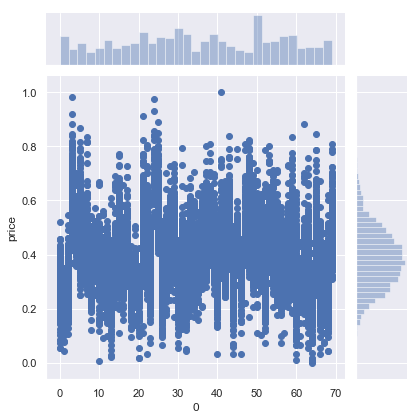

In [76]:
for column in df:
    if df[column].dtype != 'object':
        sns.jointplot(x = column, y = 'price', data = df, kind = "scatter")
    else:
        continue

### Initial Observations and Questions

In my approach above, Exploratory Data Analysis has already been taking place, and so I will reiterate my findings here:

#### 1) Do any of the variables have noticeable outliers?

Answer: Yes! The "bedroom" variable had a noticeable outlier of '33', which did not make sense given that the next highest value was '7' (a reasonable amount of bedrooms for a mansion). This was further confirmed when conducting a simple mathematical caluclation of comparing the ratio of bedrooms/sq ft. to the population as a whole, and realizing that it was too small to make sense (see "Normalizing Data" seciton above for further information).

#### 2) Are the houses within King's Count of a variety of qualty (do these appear to be poor houses in a run-down neighborhood or glitzy villas in a gated community?

Answer: Reproducing the histogram for 'grade' from the "Normalizing Data" section above, we see that there is a fairly normal distribution of the spread of house 'grades' within King's County. Having a few of a poor quality and a few of a very high quality, most of the homes are bunched within the center grades, forming a 'bell curve' (a hallmark of normally distributed data). It should be noted that these is a slight negative skew, however.

Text(0.5, 1.0, 'Histogram of Grade')

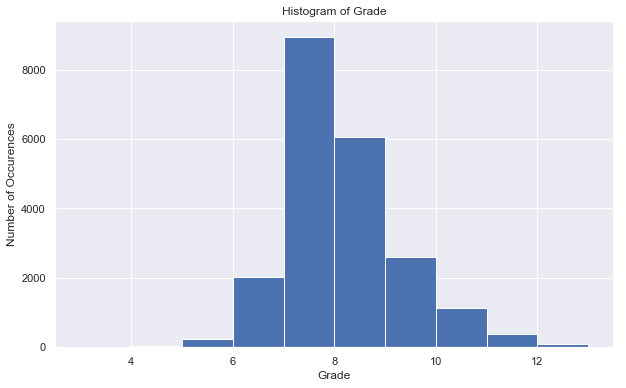

In [77]:
df_grade.hist(figsize = (10,6))
plt.xlabel("Grade")
plt.ylabel("Number of Occurences")
plt.title("Histogram of Grade")

#### 3) Are there certain areas where higher-priced houses are grouped?

Answer: Yes! By creating a 'map' using 'long' and 'lat' as the x and y variables, respectively (and by setting an optional sequence equal to 'price') it is evident that the darker colors reflect higher-priced houses. As expected, these houses appear in clusters, possibly reflecting richer neighborhoods.

Text(0.5, 1.0, 'Map of Home Sales by Price')

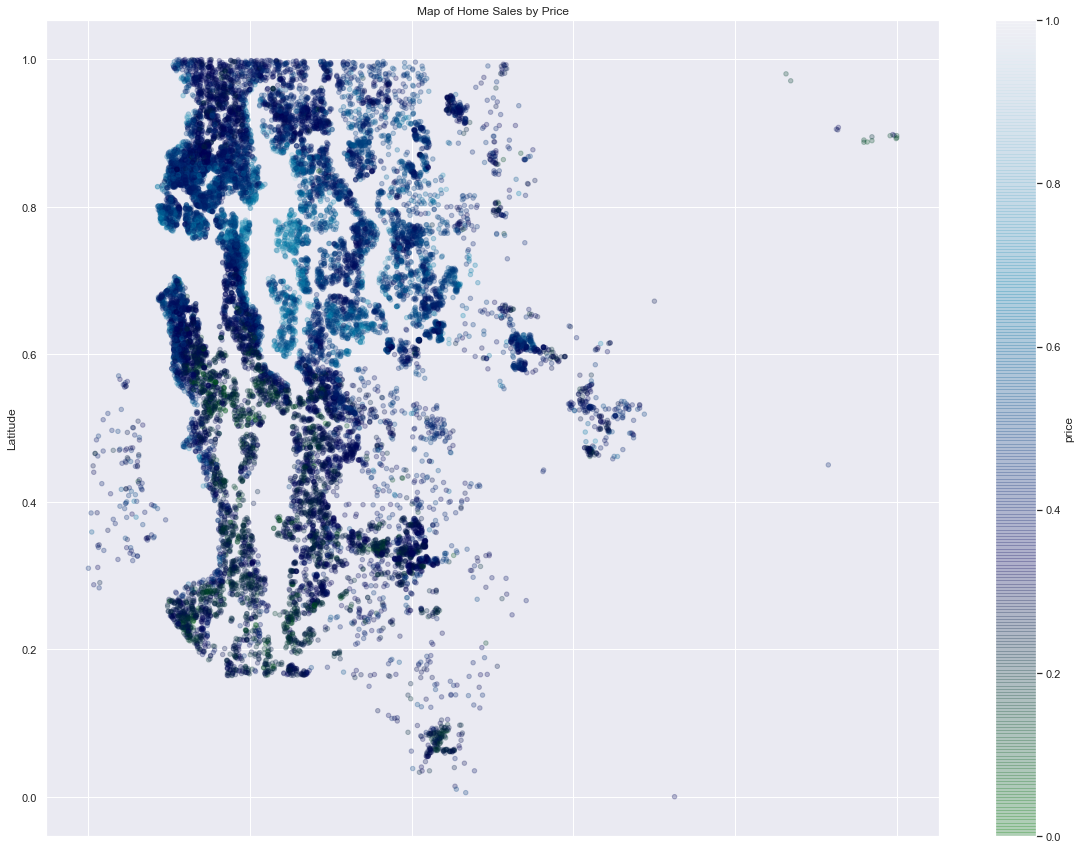

In [78]:
### I create a visual "map" of King County's house sales by calling the .plot.scatter() method.

df.plot.scatter(x='long', y='lat', alpha=.25, c='price', cmap='ocean', figsize=(20,15))
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title("Map of Home Sales by Price")

# Model Data

In [79]:
### I do one last check to check to see how my model-ready dataset looks like by calling the .head() method.

df.head()

,id,floors,lat,price,sqft_living,sqft_living15,sqft_lot,sqft_lot15,bedrooms,bathrooms,...,long,Q2_2014,Q2_2015,Q3_2014,Q4_2014,condition_2,condition_3,condition_4,condition_5,0
0,7129300520,0.000000,0.573100,0.227669,0.322166,0.441342,0.295858,0.300162,0.2,0.066667,...,0.217608,0,0,0,1,0,1,0,0,66
1,6414100192,0.553295,0.909499,0.420522,0.538392,0.525882,0.326644,0.342058,0.2,0.233333,...,0.166113,0,0,0,1,0,1,0,0,55
2,5631500400,0.000000,0.936533,0.182099,0.203585,0.699256,0.366664,0.349544,0.1,0.066667,...,0.237542,0,0,0,0,0,1,0,0,16
3,2487200875,0.000000,0.588526,0.445720,0.463123,0.446739,0.280700,0.283185,0.3,0.333333,...,0.104651,0,0,0,1,0,0,0,1,58
4,1954400510,0.000000,0.742607,0.408883,0.420302,0.548854,0.340224,0.339562,0.2,0.200000,...,0.393688,0,0,0,0,0,1,0,0,37


## Ordinary Least Squares Regression

In [80]:
### I seperate out my dependent variable (y ; 'price') from the dataframe containing my independent variables (x),
### using the .drop() method

y = pd.DataFrame(df, columns = ["price"])
x = df.drop(['price'], axis = 1)

In [81]:
## I use the simple Ordinary Least Squares method from statsmodel.api, as this avoids having to create a summation
### string

X_int = sm.add_constant(x)
model = sm.OLS(y,X_int.astype(float)).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.771
Model:                            OLS   Adj. R-squared:                  0.771
Method:                 Least Squares   F-statistic:                     3155.
Date:                Wed, 06 Nov 2019   Prob (F-statistic):               0.00
Time:                        07:27:06   Log-Likelihood:                 31981.
No. Observations:               21534   AIC:                        -6.391e+04
Df Residuals:                   21510   BIC:                        -6.372e+04
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const            -0.0576      0.011     -5.430      0.000      -0.078      -0.037
id            -2.971e-13   1.33e-13     -2.242      0.025   -5.57e-13   -3.73e-14
floors            0.0247      0.002     12.076      0.000       0.021       0.029
lat               0.1874      0.002    101.196      0.000       0.184       0.191
sqft_living       0.2636      0.008     32.556      0.000       0.248       0.280
sqft_living15     0.1213      0.005     22.883      0.000       0.111       0.132
sqft_lot          0.0279      0.009      3.162      0.002       0.011       0.045
sqft_lot15       -0.0619      0.009     -7.250      0.000      -0.079      -0.045
bedrooms         -0.0685      0.006    -12.202      0.000      -0.079      -0.057
bathrooms         0.1184      0.007     17.908      0.000       0.105       0.131
view              0.0743      0.002     34.389      0.000       0.070       0.079
grade             0.3642      0.006     64.581      0.000       0.353       0.375
sqft_basement     0.0033      0.006      0.563      0.573      -0.008       0.015
yr_built         -0.0996      0.002    -46.153      0.000      -0.104      -0.095
long             -0.0239      0.004     -5.546      0.000      -0.032      -0.015
Q2_2014          -0.0064      0.001     -5.239      0.000      -0.009      -0.004
Q2_2015           0.0104      0.001      7.789      0.000       0.008       0.013
Q3_2014          -0.0065      0.001     -5.818      0.000      -0.009      -0.004
Q4_2014          -0.0075      0.001     -6.393      0.000      -0.010      -0.005
condition_2       0.0169      0.011      1.536      0.125      -0.005       0.039
condition_3       0.0381      0.010      3.716      0.000       0.018       0.058
condition_4       0.0489      0.010      4.776      0.000       0.029       0.069
condition_5       0.0632      0.010      6.130      0.000       0.043       0.083
0                -0.0004   2.45e-05    -15.414      0.000      -0.000      -0.000
==============================================================================
Omnibus:                      386.691   Durbin-Watson:                   1.984
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              722.929
Skew:                           0.111   Prob(JB):                    1.04e-157
Kurtosis:                       3.870   Cond. No.                     3.33e+11
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.33e+11. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [82]:
#Delete this?

from sklearn.linear_model import LinearRegression
linreg = LinearRegression()
linreg.fit(x, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

## Model Fit - Stepwise Selection

In [83]:
### I use the Stepwise Selection code provided to us in the Model Fit Linear Regression chapter of of the coursebook
### to create the function stepwise_selection() below. 

def stepwise_selection(x, y, 
                       initial_list=[], 
                       threshold_in=0.01, 
                       threshold_out = 0.05, 
                       verbose=True):
    """ Perform a forward-backward feature selection 
    based on p-value from statsmodels.api.OLS
    Arguments:
        X - pandas.DataFrame with candidate features
        y - list-like with the target
        initial_list - list of features to start with (column names of X)
        threshold_in - include a feature if its p-value < threshold_in
        threshold_out - exclude a feature if its p-value > threshold_out
        verbose - whether to print the sequence of inclusions and exclusions
    Returns: list of selected features 
    Always set threshold_in < threshold_out to avoid infinite looping.
    See https://en.wikipedia.org/wiki/Stepwise_regression for the details
    """
    included = list(initial_list)
    while True:
        changed=False
        # forward step
        excluded = list(set(x.columns)-set(included))
        new_pval = pd.Series(index=excluded)
        for new_column in excluded:
            model = sm.OLS(y, sm.add_constant(pd.DataFrame(x[included+[new_column]]))).fit()
            new_pval[new_column] = model.pvalues[new_column]
        best_pval = new_pval.min()
        if best_pval < threshold_in:
            best_feature = new_pval.idxmin()
            included.append(best_feature)
            changed=True
            if verbose:
                print('Add  {:30} with p-value {:.6}'.format(best_feature, best_pval))

        # backward step
        model = sm.OLS(y, sm.add_constant(pd.DataFrame(x[included]))).fit()
        # use all coefs except intercept
        pvalues = model.pvalues.iloc[1:]
        worst_pval = pvalues.max() # null if pvalues is empty
        if worst_pval > threshold_out:
            changed=True
            worst_feature = pvalues.argmax()
            included.remove(worst_feature)
            if verbose:
                print('Drop {:30} with p-value {:.6}'.format(worst_feature, worst_pval))
        if not changed:
            break
    return included

In [84]:
### I set the variable 'result' equal to the outcome of the running the stepwise_seleciton function above with my data.

result = stepwise_selection(x.astype(float), y, verbose = True)
print('resulting features:')
print(result)

Add  grade                          with p-value 0.0
Add  yr_built                       with p-value 0.0
Add  bathrooms                      with p-value 0.0
Add  lat                            with p-value 0.0
Add  sqft_living15                  with p-value 0.0
Add  sqft_living                    with p-value 2.52217e-237
Add  view                           with p-value 1.15733e-245
Add  condition_5                    with p-value 5.87812e-40
Add  floors                         with p-value 1.88414e-42
Add                               0 with p-value 3.01165e-43
Add  Q2_2015                        with p-value 4.56497e-44
Add  condition_4                    with p-value 5.13374e-30
Add  bedrooms                       with p-value 2.57169e-30
Add  sqft_lot15                     with p-value 4.02072e-29
Add  condition_3                    with p-value 2.15089e-08
Add  long                           with p-value 4.41059e-08
Add  sqft_lot                       with p-value 0.00103185
Ad

In [85]:
X_fin = x[['sqft_living', 'lat', 'view', 'grade', 'yr_built', 'bathrooms', 'sqft_living15', 'condition_5', 'Q2_2015', 'floors', 0, 'condition_4', 'bedrooms', 'sqft_lot15', 'condition_3', 'long', 'sqft_lot', 'Q4_2014', 'Q3_2014', 'Q2_2014']]
X_with_intercept = sm.add_constant(X_fin)
model = sm.OLS(y,X_with_intercept.astype(float)).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.771
Model:                            OLS   Adj. R-squared:                  0.771
Method:                 Least Squares   F-statistic:                     3627.
Date:                Wed, 06 Nov 2019   Prob (F-statistic):               0.00
Time:                        07:27:21   Log-Likelihood:                 31977.
No. Observations:               21534   AIC:                        -6.391e+04
Df Residuals:                   21513   BIC:                        -6.374e+04
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const            -0.0448      0.005     -9.363      0.000      -0.054      -0.035
sqft_living       0.2652      0.007     36.241      0.000       0.251       0.280
lat               0.1876      0.002    101.658      0.000       0.184       0.191
view              0.0743      0.002     34.999      0.000       0.070       0.078
grade             0.3639      0.006     65.016      0.000       0.353       0.375
yr_built         -0.0996      0.002    -46.194      0.000      -0.104      -0.095
bathrooms         0.1193      0.007     18.275      0.000       0.107       0.132
sqft_living15     0.1205      0.005     22.861      0.000       0.110       0.131
condition_5       0.0488      0.004     11.754      0.000       0.041       0.057
Q2_2015           0.0104      0.001      7.781      0.000       0.008       0.013
floors            0.0243      0.002     13.654      0.000       0.021       0.028
0                -0.0004   2.45e-05    -15.387      0.000      -0.000      -0.000
condition_4       0.0345      0.004      8.645      0.000       0.027       0.042
bedrooms         -0.0686      0.006    -12.224      0.000      -0.080      -0.058
sqft_lot15       -0.0609      0.009     -7.139      0.000      -0.078      -0.044
condition_3       0.0235      0.004      5.932      0.000       0.016       0.031
long             -0.0249      0.004     -5.843      0.000      -0.033      -0.017
sqft_lot          0.0284      0.009      3.235      0.001       0.011       0.046
Q4_2014          -0.0075      0.001     -6.376      0.000      -0.010      -0.005
Q3_2014          -0.0065      0.001     -5.808      0.000      -0.009      -0.004
Q2_2014          -0.0064      0.001     -5.241      0.000      -0.009      -0.004
==============================================================================
Omnibus:                      384.919   Durbin-Watson:                   1.984
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              720.519
Skew:                           0.110   Prob(JB):                    3.48e-157
Kurtosis:                       3.869   Cond. No.                     1.28e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.28e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Validation - Train-Test Split

In [87]:
### I use the train_test_split tool from scikitlearn to create two (2) sets of two (2) variables totaling four (4)
### variables: 

###    1) a randomly selected set of independent variables for training (X_train)
###    2) a randomly selected set of dependent variables for training (y_trian)
###    3) a randomly selected set of independent variables for testing (X_test)
###    4) a randomly selected set of dependent variables for testing (y_test)
    
### The standard for splitting the data between testing sets and training sets is approximately 30%/70%, respectively.
### I do this by setting the test_size parameter within the train_test_split method to '0.3')

X_train, X_test, y_train, y_test = train_test_split(X_fin, y, test_size=0.3)

In [91]:
### I run a linear regression with the new training dataset using the Linear Regression tool from SkiKitLearn. I then
### predict the y values (price) for both the training set and testing set. These are set to the variables y_hat_train
### and y_hat_test, respectively.

linreg = LinearRegression()
linreg.fit(X_train, y_train)

y_hat_train = linreg.predict(X_train)
y_hat_test = linreg.predict(X_test)

[[0.30766411]
 [0.39958646]
 [0.58496316]
 ...
 [0.388301  ]
 [0.19146359]
 [0.63757141]]


In [90]:
### I calculate the MSE using the mean_squared_error tool from SciKitLearn. This calculates the difference between the
### mean value of the residuals (the difference between predicted values [y_hat...] and the actual values [y_...]) for
### both our testing dataset and training dataset.

train_mse = mean_squared_error(y_train, y_hat_train)
test_mse = mean_squared_error(y_test, y_hat_test)
print('Train Mean Squarred Error:', train_mse)
print('Test Mean Squarred Error:', test_mse)

Train Mean Squarred Error: 0.0029800937667667656
Test Mean Squarred Error: 0.0030664246393964163


### Result

The difference between the MSESs for both the training dataset (~0.0029) and testing dataset (~0.0030) are small. The model is a good fit! 

In [ ]:
TO-DO


Complete Slides (as PDF Export)
    Include in GitHub as presentation.pdf
Upload Jupyter Notebook to GitHub
Create README file in GitHub
Complete Blogpost (800 words)
A Video Walkthrough (using Zoom, Github, or Nimbus)

# OSEMN Framework

The OSEMN Framework is a process for conducting data analytics and is composed of the following steps:

#### Obtain

The first component of the framework is to obtain data. For this data analytics project, obtaining the data was fairly simple: the data was provided in a .csv file, and was imported into a DataFrame (after importing the pandas library, of course). Additional libraries that were imported include: numpy, matplotlib, seaborn, statsmodels, and sklearn.

#### Scrub

The second compnent is to "scrub" the data. This means reviewing the data in detail, cleaning it when necessary so as to prevent erroneous or misleading results when the data is used to run regressions. In particular, for the King County Data Set, I located and removed null values by either removing rows with missing data or entire columns. Where appropriate, I changed the data type for the columns in the dataset to one more appropriate. In the event they originally were or were recast as categorical values, I encoded them so as to still be able to use them in the regression analysis.  I identified variables that whose correlation could affect the testing results (multicollinearity) and removed one of the columns. Finally, to limit the impact of the magnitudes that differing scales of each of our independent variables may have on the dependent variable, I normalized the data by subtracting each value of x from its mean, then dividing that difference by the standard deviation of the variable. This resulted in all data now measuring on the same scale.

#### Explore

The third step is to explore the data in order to better understand it. Familiarity with the underlying data will provide insight into the resultant data modeling. Otherwise, the outcome would be without context and it could be difficult to understand the conclusions reached by the model. The usage of histograms, jointplots, and other graphs helps demonstrate relationshps between variables that may prove to be interesting, or reuiqre further examination. Ultimately, modeling data will be of no benefit if there isn't a solid understanding of its foundation.

#### Model

The fourth step is to model your data. I run my initial multiple linear regression using the Ordinary Least Squares Regression model from Statsmodel. After completing the Stepwise Selection. It appears that most of my variables were kept in my model, and three (3) were removed. Due to this, it appears that neither the R-squared value nor the R-squared adj value have changed between both models (0.771).

While we have a good R-squared value from our initial OLS regression above (meaning that approximately 77.1% of variability in the dependent variable price can be explained by our independent variables), the nature of R-squared is such that EVERY independent variable added will INCREASE the value of R-squared. So, in order to find the best model with the predictors that have the most impact, I will use the Stepwise Selection method to include only the variables within a specific threshold. In this case, it will be variables with a p-value of less that 0.05. By having such a value, these variables are considered *statistically significant*.

It is important to randomly split your data between a set used to train the data, and another set to test the data. I need to be careful about how of the data is put into each group, as training the model with too little data can lead to an underfitted model, while using too much of the trianing data can overfit it and make it un-generalizeable. For both data sets, I will determine the residuals by comparing the predicted value with the actual value, then compare the residuals, themselves between both sets using the Mean Squared error (MSE). If MSE between both the training and testing sets are roughly equivalent, then that means that the model is appropriately fitted and can be used to make predictions.

#### iNterpret

There are multiple variables that help us predict housing prices in King's County, as evidenced above. Three of them are expounded upon below, including their relationship to the dependent variable and how a change in the independent variables affect the dependent one.

Variables:

1. **bathrooms** - As noted by the coefficient (0.1193), there is a positive relationship that the number of bathrooms has with the price of the house. As our model has log(price) instead of price as the variable used, there is some adjustment we need to make for the interpretation. When only the dependent variable is log-transformed, then you need to exponentiate the coefficient, subtract one from this number, and multiply by 100. It looks like the following:

   A one unit increase in the (scaled) number of bathrooms increases the (scaled) price by ((exp(0.1193)-1)x100) 12.67%
   
   
2. **sqft_lot15** - As noted by the coefficient (-0.0609), there is a negative relationship that the square footage of the land lots of the nearest 15 neighbors has with the price of the house. As our model has log(price) instead of price and log(sqft_lot15) instead of sqft_lot15 as the variables used, there is some adjustment we need to make for the interpretation. When the dependent variable and the independent variable are both log-transformed, then you need to interpret the coefficient as the percent increase in the dependent variable for every 1% increase in the independent variable.

    In other words, for every 1% (scaled) increase in the square footage of the land lots of the 15 nearest neighbors, the (scaled) price of the house decreases by 0.06%. This, interestingly, means that the larger the property of your neighbors, the less your house will be worth.
    

3. **floors** - As noted by the coefficient (0.0243), there is a positive relationship that the number of floors has with the price of the house. As our model has log(price) instead of price and log(floors) instead of floors as the variables used, there is some adjustment we need to make for the interpretation. When the dependent variable and the independent variable are both log-transformed, then you need to interpret the coefficient as the percent increase in the dependent variable for every 1% increase in the independent variable.

   In other words, for every 1% (scaled) increase in the number of floors, the (scaled) price of the house increases by 0.02%. Logically, however, you either have a floor or you don't, so we can interpret this as a 100% increase in the independent variable (the adding of a floor) increases the price by 2.43%. this is a weak, but positive and statistically significant relationship.